In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import seaborn as sns

In [162]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [164]:
drop_cols = ["공고번호", "주택명", '공급지역명', '공급위치우편번호', '공급위치', '모집공고일', '청약접수시작일', '청약접수종료일', '당첨자발표일', '주택형', '최저당첨가점', '최고당첨가점', '위도', '경도', '행정동코드', '시도', '시군구', '읍면동1', '읍면동2', '전용면적당 공급금액(최고가기준)']
train.drop(drop_cols, axis=1, inplace=True)

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19824 entries, 0 to 19823
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공급지역코드        19824 non-null  int64  
 1   공급규모          19824 non-null  int64  
 2   투기과열지구        19824 non-null  object 
 3   조정대상지역        19824 non-null  object 
 4   분양가상한제        19824 non-null  object 
 5   정비사업          19824 non-null  object 
 6   공공주택지구        19824 non-null  object 
 7   대규모택지개발지구     19824 non-null  object 
 8   수도권내민영공공주택지구  19824 non-null  object 
 9   공급세대수         19824 non-null  int64  
 10  순위            19824 non-null  object 
 11  거주지역          19824 non-null  object 
 12  접수건수          19824 non-null  int64  
 13  경쟁률           19824 non-null  float64
 14  평균당첨가점        19780 non-null  object 
 15  전용면적          19824 non-null  int64  
 16  평면유형          19824 non-null  object 
 17  미달여부          19824 non-null  object 
 18  공급금액(최고가 기준)  19824 non-nu

In [166]:
train.평균당첨가점 = train.평균당첨가점.str.replace("-", "0")

In [167]:
train.평균당첨가점.fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11916\121979348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.평균당첨가점.fillna(0, inplace=True)


In [168]:
train.평균당첨가점 = train.평균당첨가점.astype(float)


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19824 entries, 0 to 19823
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공급지역코드        19824 non-null  int64  
 1   공급규모          19824 non-null  int64  
 2   투기과열지구        19824 non-null  object 
 3   조정대상지역        19824 non-null  object 
 4   분양가상한제        19824 non-null  object 
 5   정비사업          19824 non-null  object 
 6   공공주택지구        19824 non-null  object 
 7   대규모택지개발지구     19824 non-null  object 
 8   수도권내민영공공주택지구  19824 non-null  object 
 9   공급세대수         19824 non-null  int64  
 10  순위            19824 non-null  object 
 11  거주지역          19824 non-null  object 
 12  접수건수          19824 non-null  int64  
 13  경쟁률           19824 non-null  float64
 14  평균당첨가점        19824 non-null  float64
 15  전용면적          19824 non-null  int64  
 16  평면유형          19824 non-null  object 
 17  미달여부          19824 non-null  object 
 18  공급금액(최고가 기준)  19824 non-nu

### NaN값 처리

In [170]:
train.isnull().sum()

공급지역코드             0
공급규모               0
투기과열지구             0
조정대상지역             0
분양가상한제             0
정비사업               0
공공주택지구             0
대규모택지개발지구          0
수도권내민영공공주택지구       0
공급세대수              0
순위                 0
거주지역               0
접수건수               0
경쟁률                0
평균당첨가점             0
전용면적               0
평면유형               0
미달여부               0
공급금액(최고가 기준)       0
법정동코드           1072
dtype: int64

In [171]:
# 새로 들어올 train은 법정동 코드 null 값 없음 여기서는 일단 열 드랍하고 시작하기

train.drop("법정동코드", axis=1, inplace=True)

### train, test set 분리

stratify 기준 설정을 위해 분포확인

In [ ]:
categorical_columns = [
    '투기과열지구',
    '조정대상지역',
    '분양가상한제',
    '정비사업',
    '공공주택지구',
    '대규모택지개발지구',
    '수도권내민영공공주택지구',
    '순위',
    '거주지역',
    '평면유형',
    '미달여부'
]

# 각 컬럼의 분포 분석
for column in categorical_columns:
    distribution = train[column].value_counts()
    distribution_percentage = train[column].value_counts(normalize=True) * 100
    
    print(f"컬럼: {column}")
    print("분포:")
    print(distribution)
    print("\n비율(%)")
    print(distribution_percentage)
    print("\n---\n")


컬럼: 투기과열지구
분포:
투기과열지구
N    14964
Y     4860
Name: count, dtype: int64

비율(%)
투기과열지구
N    75.484262
Y    24.515738
Name: proportion, dtype: float64

---

컬럼: 조정대상지역
분포:
조정대상지역
N    10178
Y     9646
Name: count, dtype: int64

비율(%)
조정대상지역
N    51.341808
Y    48.658192
Name: proportion, dtype: float64

---

컬럼: 분양가상한제
분포:
분양가상한제
N    13702
Y     6122
Name: count, dtype: int64

비율(%)
분양가상한제
N    69.118241
Y    30.881759
Name: proportion, dtype: float64

---

컬럼: 정비사업
분포:
정비사업
N    14536
Y     5288
Name: count, dtype: int64

비율(%)
정비사업
N    73.325262
Y    26.674738
Name: proportion, dtype: float64

---

컬럼: 공공주택지구
분포:
공공주택지구
N    18948
Y      876
Name: count, dtype: int64

비율(%)
공공주택지구
N    95.581114
Y     4.418886
Name: proportion, dtype: float64

---

컬럼: 대규모택지개발지구
분포:
대규모택지개발지구
N    14228
Y     5596
Name: count, dtype: int64

비율(%)
대규모택지개발지구
N    71.77159
Y    28.22841
Name: proportion, dtype: float64

---

컬럼: 수도권내민영공공주택지구
분포:
수도권내민영공공주택지구
N    19114
Y      710
Name: count, dtype: int64

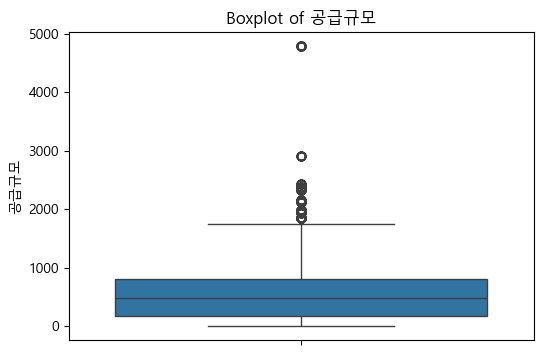

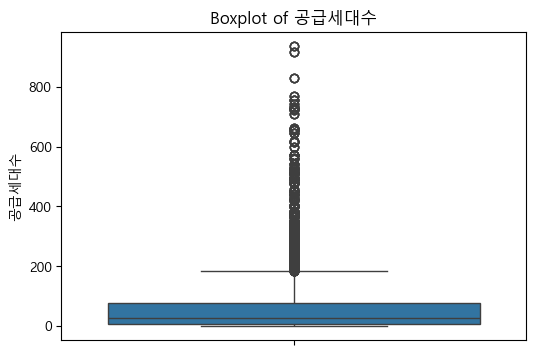

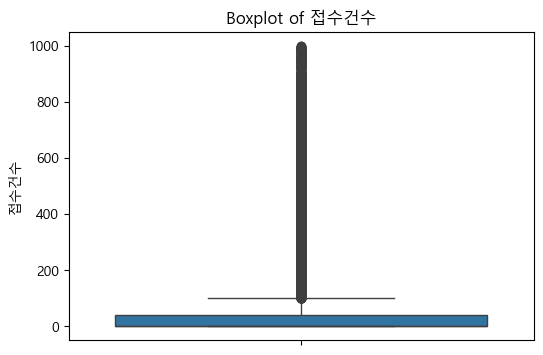

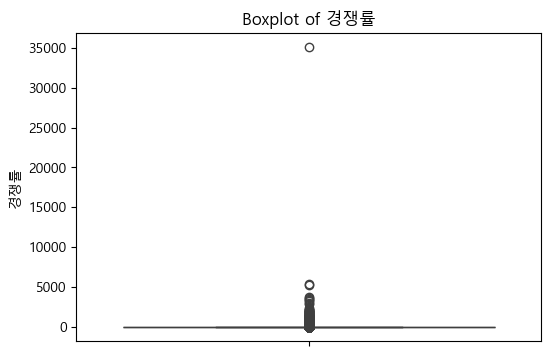

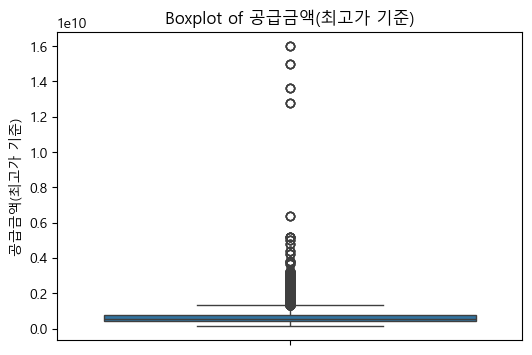

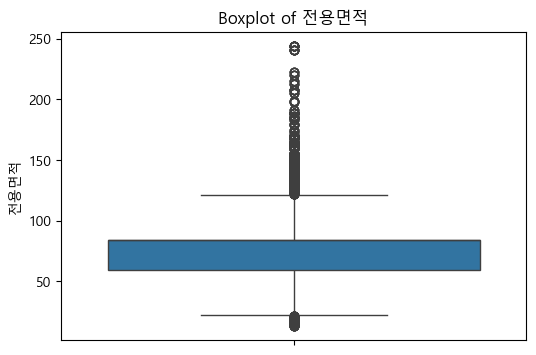

In [ ]:
columns_to_check = ['공급규모', '공급세대수', '접수건수', '경쟁률', '공급금액(최고가 기준)', '전용면적']

for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(columns=["평균당첨가점"]),  # 타겟(평균당첨가점) 제외
    train["평균당첨가점"],  # 타겟
    test_size=0.2,
    random_state=42,
    stratify=train["미달여부"]  # 분포 맞추기 위해 미달여부로 stratify
)

In [176]:
X_train.columns

Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '전용면적', '평면유형', '미달여부', '공급금액(최고가 기준)'],
      dtype='object')

### 로그변환

'공급규모', '공급세대수', '접수건수' -> 데이터가 너무 비대칭적이고 값의 범위가 너무 큼 -> 로그변환 쎄리기

In [177]:
# 정규화 필요 컬럼
columns_to_transform = ['공급규모', '공급세대수', '접수건수']

# 로그 변환 (0 이상의 값만 가능하므로 음수나 0이 있다면 처리 필요)
for column in columns_to_transform:
    X_train[column] = np.log1p(X_train[column])  # log(1 + x) 변환
    X_test[column] = np.log1p(X_test[column])   # log(1 + x) 변환


In [178]:
X_train[columns_to_transform]

,공급규모,공급세대수,접수건수
10881,7.016610,4.488636,0.000000
8741,4.553877,2.833213,2.197225
1500,5.662960,1.609438,0.000000
9104,6.821107,5.225747,3.526361
9923,5.093750,3.761200,0.000000
...,...,...,...
14651,6.885510,4.770685,0.000000
5529,5.117994,3.433987,0.000000
6716,5.860786,1.098612,4.262680
7377,6.386879,3.784190,2.197225


### 수치형 정규화

In [179]:
X_train.describe()

,공급지역코드,공급규모,공급세대수,접수건수,경쟁률,전용면적,공급금액(최고가 기준)
count,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,1.585900e+04
mean,344.418311,5.903365,3.239830,1.920293,24.107726,78.304054,7.028741e+08
std,124.555638,1.135143,1.414977,2.171493,310.068201,23.445474,6.061992e+08
min,100.000000,0.693147,0.000000,0.000000,0.000000,13.000000,1.377000e+08
25%,400.000000,5.147494,2.079442,0.000000,0.000000,59.000000,4.315000e+08
50%,410.000000,6.165418,3.332205,1.098612,0.000000,84.000000,5.552500e+08
75%,410.000000,6.697034,4.369448,3.688879,1.750000,84.000000,7.921000e+08
max,410.000000,8.473659,6.842683,6.907755,35076.000000,244.000000,1.600000e+10


Standard : 공급규모, 공급세대수, 접수건수, 공급금액 [이상치가 많음]  
minmax : 전용면적, 경쟁률 [상대적으로 이상치 영향이 적음]  

In [ ]:
columns_to_normalize = ['공급규모', '공급세대수', '접수건수', '공급금액(최고가 기준)']

# Min-Max Scaling
MM_scaler = MinMaxScaler()
X_train[columns_to_normalize] = MM_scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = MM_scaler.transform(X_test[columns_to_normalize])

In [ ]:
columns_to_normalize = ['전용면적', '경쟁률']

# Standardization
SD_scaler = StandardScaler()
X_train[columns_to_normalize] = SD_scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = SD_scaler.transform(X_test[columns_to_normalize])


In [182]:
# 정규화된 컬럼 확인
columns_to_normalize = ['전용면적']

normalized_train_X = X_train[columns_to_normalize].head()
normalized_test_X = X_test[columns_to_normalize].head()

In [183]:
normalized_train_X

,전용면적
10881,2.205013
8741,-0.354197
1500,-0.183583
9104,-0.183583
9923,-0.823385


### 범주형 인코딩

In [184]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15859 entries, 10881 to 7152
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공급지역코드        15859 non-null  int64  
 1   공급규모          15859 non-null  float64
 2   투기과열지구        15859 non-null  object 
 3   조정대상지역        15859 non-null  object 
 4   분양가상한제        15859 non-null  object 
 5   정비사업          15859 non-null  object 
 6   공공주택지구        15859 non-null  object 
 7   대규모택지개발지구     15859 non-null  object 
 8   수도권내민영공공주택지구  15859 non-null  object 
 9   공급세대수         15859 non-null  float64
 10  순위            15859 non-null  object 
 11  거주지역          15859 non-null  object 
 12  접수건수          15859 non-null  float64
 13  경쟁률           15859 non-null  float64
 14  전용면적          15859 non-null  float64
 15  평면유형          15859 non-null  object 
 16  미달여부          15859 non-null  object 
 17  공급금액(최고가 기준)  15859 non-null  float64
dtypes: float64(6), int64(1), obj

In [185]:
X_train.head(1)

,공급지역코드,공급규모,투기과열지구,조정대상지역,분양가상한제,정비사업,공공주택지구,대규모택지개발지구,수도권내민영공공주택지구,공급세대수,순위,거주지역,접수건수,경쟁률,전용면적,평면유형,미달여부,공급금액(최고가 기준)
10881,400,0.812731,Y,Y,N,N,N,Y,N,0.655976,2순위,기타지역,0.0,-0.077752,2.205013,3,Y,0.078507


In [186]:
# 투기과열지구	조정대상지역	분양가상한제	정비사업	공공주택지구	대규모택지개발지구	수도권내민영공공주택지구 미달여부	이새끼들은 Y랑 N으로만 값이 있어서 원핫인코딩 하고
# 순위도 1순위 2순위만, 거주지역도 2개만만 있음 원핫 갈기자

# 평면유형 얘는 좀 유니크값이 많아..30개정도였던것 같아 

In [ ]:
# 원핫 인코딩 - Y / N 값만 있는 컬럼 , 고윳값이 3개 이하
X_train = pd.get_dummies(X_train, columns=['투기과열지구', '조정대상지역', '분양가상한제', '정비사업','공공주택지구','대규모택지개발지구','수도권내민영공공주택지구','미달여부', '순위', '거주지역'])
X_test = pd.get_dummies(X_test, columns=['투기과열지구', '조정대상지역', '분양가상한제', '정비사업','공공주택지구','대규모택지개발지구','수도권내민영공공주택지구','미달여부', '순위', '거주지역'])

In [188]:
# Train 데이터 기준으로 Test 데이터의 컬럼을 맞춤
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 나중에 인덱스 관련해서 안맞으면 여기 실행해보기

In [190]:
# 레이블 인코더 객체 생성
label_encoder = LabelEncoder()

# Train 데이터 레이블 인코딩
X_train['평면유형_encoded'] = label_encoder.fit_transform(X_train['평면유형'])
X_test['평면유형_encoded'] = label_encoder.transform(X_test['평면유형'])

In [ ]:
# 고유값과 인코딩된 값 매핑 확인
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("\n레이블 매핑:")
print(mapping)

# 평면유형 관련해서는 data_preprocessing 내부에서 코드 고치기 필요함 일단 진행


레이블 매핑:
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32}


In [194]:
# 평면유형 컬럼 삭제
X_train = X_train.drop('평면유형', axis=1, errors='ignore')
X_test = X_test.drop('평면유형', axis=1, errors='ignore')


In [195]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15859 entries, 10881 to 7152
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   공급지역코드          15859 non-null  int64  
 1   공급규모            15859 non-null  float64
 2   공급세대수           15859 non-null  float64
 3   접수건수            15859 non-null  float64
 4   경쟁률             15859 non-null  float64
 5   전용면적            15859 non-null  float64
 6   공급금액(최고가 기준)    15859 non-null  float64
 7   투기과열지구_N        15859 non-null  bool   
 8   투기과열지구_Y        15859 non-null  bool   
 9   조정대상지역_N        15859 non-null  bool   
 10  조정대상지역_Y        15859 non-null  bool   
 11  분양가상한제_N        15859 non-null  bool   
 12  분양가상한제_Y        15859 non-null  bool   
 13  정비사업_N          15859 non-null  bool   
 14  정비사업_Y          15859 non-null  bool   
 15  공공주택지구_N        15859 non-null  bool   
 16  공공주택지구_Y        15859 non-null  bool   
 17  대규모택지개발지구_N     15859 non-null  b

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 모델 초기화
model = RandomForestRegressor(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 (RMSE와 R^2 계산)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse) # 낮을수록 좋음
print("R^2 Score:", r2) # 1에 가까울수록 좋음


RMSE: 6.882581212006973
R^2 Score: 0.9109470119509193


RMSE 약 8.2% 오차